In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

data = pd.read_csv("D://avocado.csv")

print(data.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900

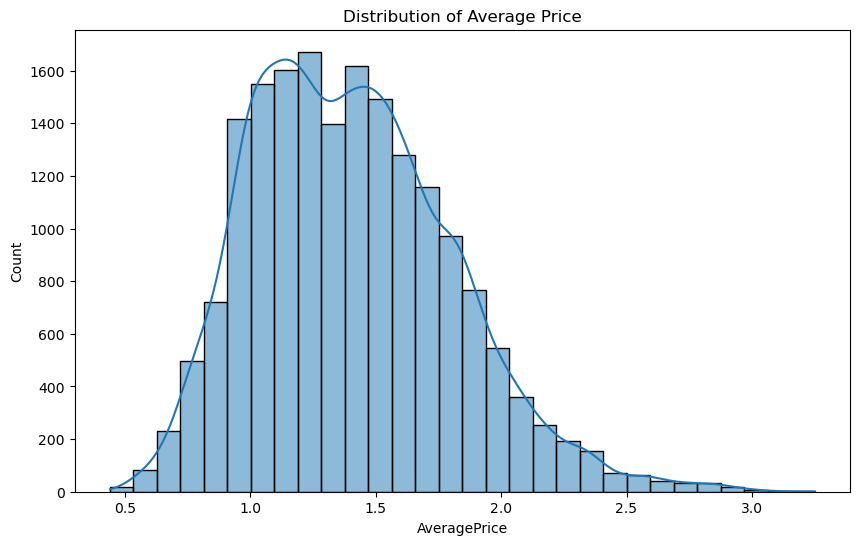

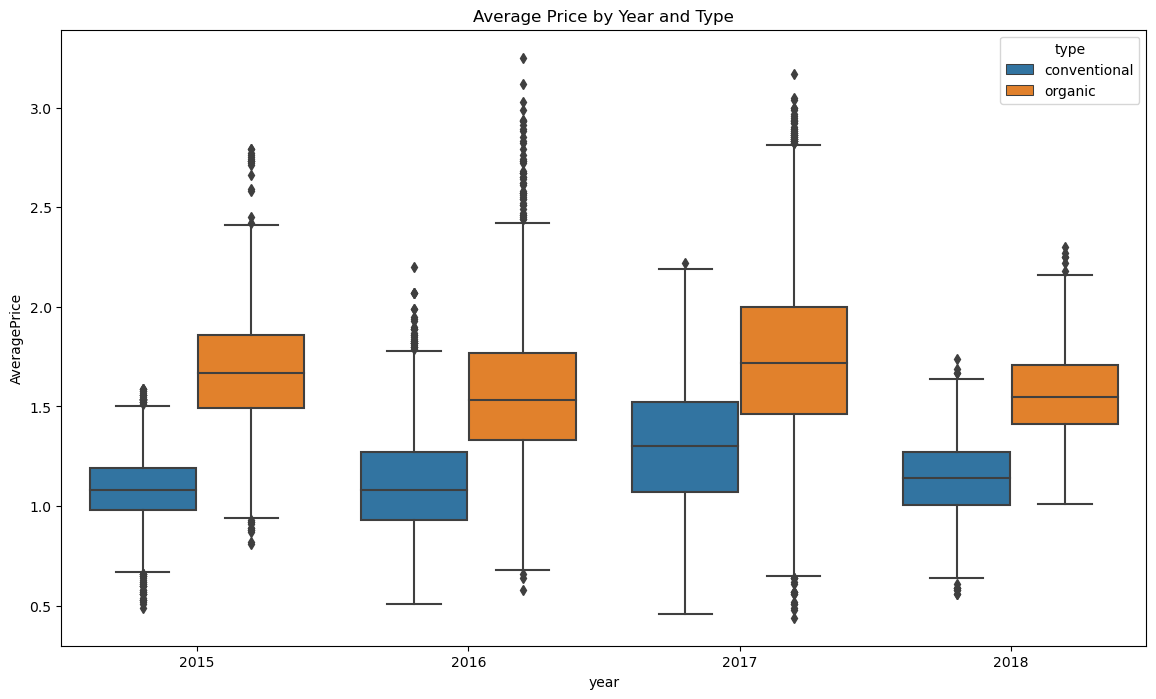

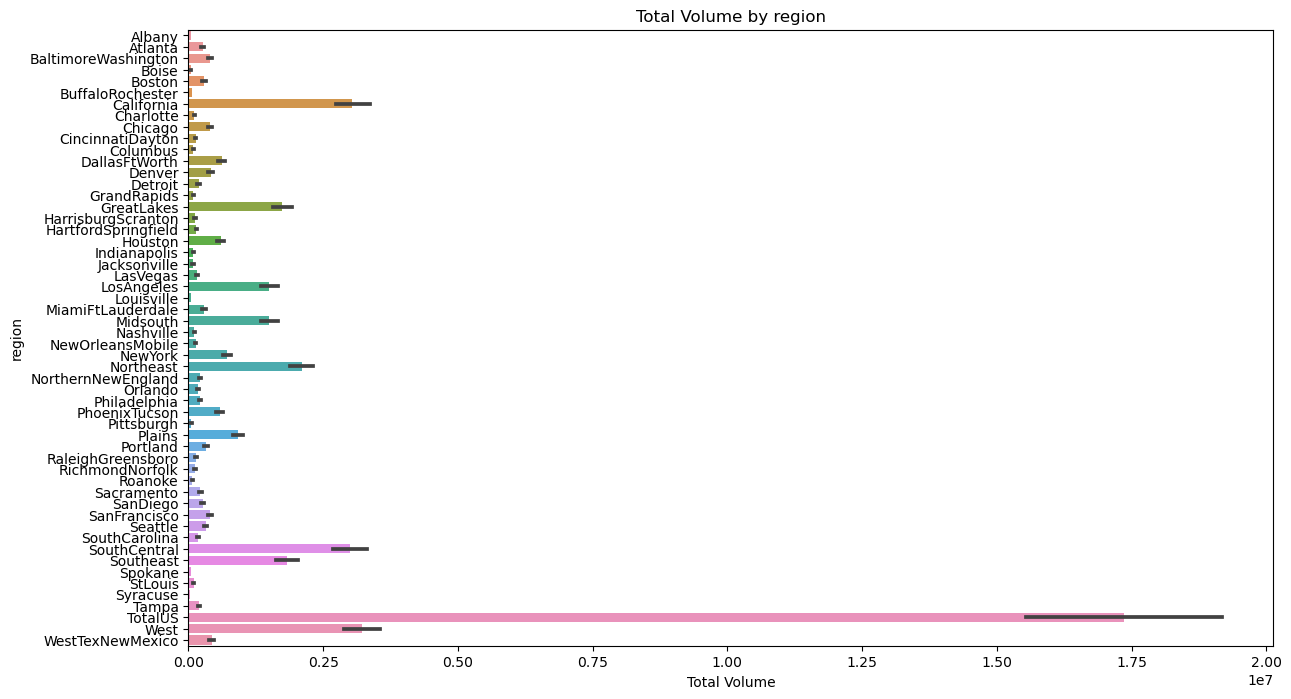

In [4]:
print(data.info())
print(data.describe())

print(data.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(data['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Price')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='year', y='AveragePrice', hue='type', data=data)
plt.title('Average Price by Year and Type')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Total Volume', y='region', data=data)
plt.title('Total Volume by region')
plt.show()


In [3]:
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['region'] = label_encoder.fit_transform(data['region'])

X_classification = data.drop(columns=['type', 'Date', 'AveragePrice'])
y_classification = data['type']

X_regression = data.drop(columns=['AveragePrice', 'Date'])
y_regression = data['AveragePrice']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


In [4]:
 
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_class, y_train_class)
log_reg_pred = log_reg.predict(X_test_class)

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train_class, y_train_class)
rf_class_pred = rf_class.predict(X_test_class)

print("Logistic Regression Classification Report:")
print(classification_report(y_test_class, log_reg_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, log_reg_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test_class, rf_class_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, rf_class_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1820
           1       0.86      0.97      0.91      1830

    accuracy                           0.90      3650
   macro avg       0.91      0.90      0.90      3650
weighted avg       0.91      0.90      0.90      3650

Confusion Matrix:
[[1519  301]
 [  47 1783]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       1.00      1.00      1.00      1830

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650

Confusion Matrix:
[[1819    1]
 [   5 1825]]


In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
lin_reg_pred = lin_reg.predict(X_test_reg)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
rf_reg_pred = rf_reg.predict(X_test_reg)

def evaluate_regression(model, X_test, y_test, predictions):
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f"Model: {model}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

print("Linear Regression Evaluation:")
evaluate_regression('Linear Regression', X_test_reg, y_test_reg, lin_reg_pred)

print("Random Forest Regressor Evaluation:")
evaluate_regression('Random Forest Regressor', X_test_reg, y_test_reg, rf_reg_pred)


Linear Regression Evaluation:
Model: Linear Regression
RMSE: 0.30808146389871044
R²: 0.40925667565865254
Random Forest Regressor Evaluation:
Model: Random Forest Regressor
RMSE: 0.127978751104418
R²: 0.8980602839324056


In [6]:
param_grid_class = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search_class = GridSearchCV(estimator=rf_class, param_grid=param_grid_class, cv=5, n_jobs=-1, verbose=2)
grid_search_class.fit(X_train_class, y_train_class)

best_rf_class = grid_search_class.best_estimator_
best_rf_class_pred = best_rf_class.predict(X_test_class)
print("Tuned Random Forest Classifier Classification Report:")
print(classification_report(y_test_class, best_rf_class_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, best_rf_class_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuned Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       1.00      1.00      1.00      1830

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650

Confusion Matrix:
[[1819    1]
 [   4 1826]]


In [7]:
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search_reg = GridSearchCV(estimator=rf_reg, param_grid=param_grid_reg, cv=5, n_jobs=-1, verbose=2)
grid_search_reg.fit(X_train_reg, y_train_reg)

best_rf_reg = grid_search_reg.best_estimator_
best_rf_reg_pred = best_rf_reg.predict(X_test_reg)
print("Tuned Random Forest Regressor Evaluation:")
evaluate_regression('Tuned Random Forest Regressor', X_test_reg, y_test_reg, best_rf_reg_pred)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuned Random Forest Regressor Evaluation:
Model: Tuned Random Forest Regressor
RMSE: 0.1270946447894948
R²: 0.899463864480835


In [ ]:
# Avocado Project

## Introduction
This project utilizes data from the Hass Avocado Board to predict the type and average price of avocados based on various features. The dataset includes weekly retail scan data for Hass avocados.

## Data Overview
- **Number of samples**: X (replace with actual number)
- **Number of features**: 11
- **Features**: Date, AveragePrice, type, year, Region, Total Volume, 4046, 4225, 4770
- **Target Variables**: 
  - Classification: type (conventional or organic)
  - Regression: AveragePrice

## Methodology

### 1. Data Import and Libraries
- Imported necessary libraries and loaded the dataset.

### 2. Exploratory Data Analysis (EDA)
- Conducted an overview of the data.
- Visualized distributions and relationships between features and target variables.

### 3. Data Preprocessing and Feature Engineering
- Encoded categorical variables.
- Standardized features.
- Split data into training and testing sets.

### 4. Classification Task: Predicting the Type of Avocado
- Models used: Logistic Regression, Random Forest Classifier
- Evaluation metrics: Classification report, confusion matrix

### 5. Regression Task: Predicting the Average Price of Avocados
- Models used: Linear Regression, Random Forest Regressor
- Evaluation metrics: RMSE, R²

### 6. Hyperparameter Tuning and Model Selection
- Performed hyperparameter tuning for both classification and regression tasks.
- Selected the best models based on evaluation metrics.

## Findings

- **Best performing model for classification**: Tuned Random Forest Classifier
  - **Classification Report**: 
  - **Confusion Matrix**: 
  
- **Best performing model for regression**: Tuned Random Forest Regressor
  - **RMSE**: X (0.1270946447894948)
  - **R²**: Y   (0.899463864480835)

## Conclusion
The Tuned Random Forest models provided the best performance for both classification and regression tasks based on the evaluation metrics. These models were chosen as the final models for predicting the type and average price of avocados.

## Future Work
Further improvements can be made by exploring additional features, experimenting with other machine learning algorithms, and fine-tuning the hyperparameters more extensively.
